In [74]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib
import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time

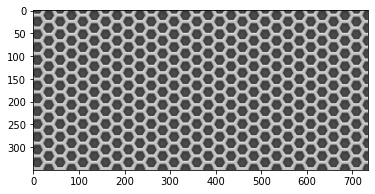

In [75]:
img_orig = cv.imread(r"C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP2\metalgrid.jpg")
plt.imshow(img_orig)
plt.show()

In [76]:
gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)

# Suavizado Gaussiano
#====================
start = time.time()

blur = cv.GaussianBlur(gray,(5,5),0)

elapsed = time.time()-start
print('Blur {} segundos'.format(elapsed))

# Gradientes
#===========
start = time.time()

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

elapsed = time.time()-start
print('Gradientes {} segundos'.format(elapsed))

Blur 0.0 segundos
Gradientes 0.04168438911437988 segundos


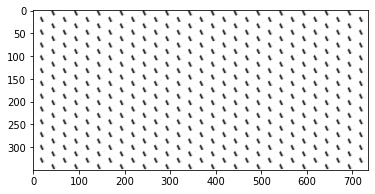

In [79]:
M, N = mag.shape
out = np.zeros((M,N), dtype= np.uint8)
ang_min = -45
ang_max = 0
output = np.where(np.logical_and(angle > ang_min, angle < ang_max),mag, out)
output = (255-output)

plt.imshow(output,cmap = 'gray')
plt.show()



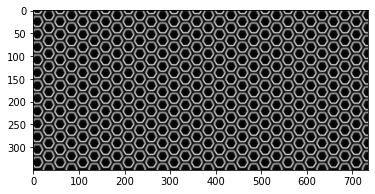

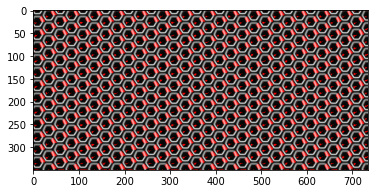

In [80]:
magrgb = cv.cvtColor(mag,cv.COLOR_GRAY2RGB)

plt.imshow(cv.cvtColor(magrgb, cv.COLOR_RGB2BGR))
plt.show()

magrgb[:,:,2] = magrgb[:,:,2]+output

plt.imshow(cv.cvtColor(magrgb, cv.COLOR_RGB2BGR))
plt.show()

